In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append("../../")

import pyaldata as pyal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from tools.reports.report_initial import run_initial_report
from tools.params import Params, colors
from tools.dsp.preprocessing import preprocess
import tools.viz.mean_firing as firing
import tools.viz.dimensionality as dim
import tools.viz.utilityTools as vizutils
import tools.decoding.rrr as rrr
import tools.decoding.decodeTools as decutils
import tools.dataTools as dt




In [2]:
# Files 
session = 'M062_2025_03_21_14_00'
data_dir = f"/data/bnd-data/raw/M062/{session}"

areas=["MOp", "SSp", "CP", "VAL"]
df = pyal.load_pyaldata(data_dir)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted t

In [3]:
df_ = preprocess(df, only_trials=False, repair_time_varying_fields=['MotSen1_X', 'MotSen1_Y'])

Repairing columns ['MotSen1_X', 'MotSen1_Y']
Extending index to 47999 in trial: free and id: 707, inserting NaN.
Extending index to 47989 in trial: free and id: 707, inserting NaN.
Extending index to 47990 in trial: free and id: 707, inserting NaN.
Extending index to 47991 in trial: free and id: 707, inserting NaN.
Extending index to 47992 in trial: free and id: 707, inserting NaN.
Extending index to 47993 in trial: free and id: 707, inserting NaN.
Extending index to 47994 in trial: free and id: 707, inserting NaN.
Extending index to 47995 in trial: free and id: 707, inserting NaN.
Extending index to 47996 in trial: free and id: 707, inserting NaN.
Extending index to 47997 in trial: free and id: 707, inserting NaN.
Extending index to 47998 in trial: free and id: 707, inserting NaN.
Extending index to 47999 in trial: free and id: 707, inserting NaN.


/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assum

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (122, 16000)
Resulting SSp_spikes ephys data shape is (NxT): (66, 16000)
Resulting all_spikes ephys data shape is (NxT): (23, 16000)
Resulting CP_spikes ephys data shape is (NxT): (280, 16000)
Resulting MOp_spikes ephys data shape is (NxT): (179, 16000)


In [4]:
pyal.get_time_varying_fields(df_)

['values_MotSen1_X',
 'idx_MotSen1_X',
 'values_MotSen1_Y',
 'idx_MotSen1_Y',
 'hip_center',
 'left_ankle',
 'left_ankle_angle',
 'left_elbow',
 'left_elbow_angle',
 'left_foot',
 'left_knee',
 'left_knee_angle',
 'left_paw',
 'left_shoulder',
 'left_wrist',
 'left_wrist_angle',
 'right_ankle',
 'right_ankle_angle',
 'right_elbow',
 'right_elbow_angle',
 'right_foot',
 'right_knee',
 'right_knee_angle',
 'right_paw',
 'right_shoulder',
 'right_wrist',
 'right_wrist_angle',
 'shoulder_center',
 'tail_base',
 'tail_middle',
 'tail_tip',
 'VAL_spikes',
 'SSp_spikes',
 'all_spikes',
 'CP_spikes',
 'MOp_spikes',
 'VAL_rates',
 'SSp_rates',
 'all_rates',
 'CP_rates',
 'MOp_rates']

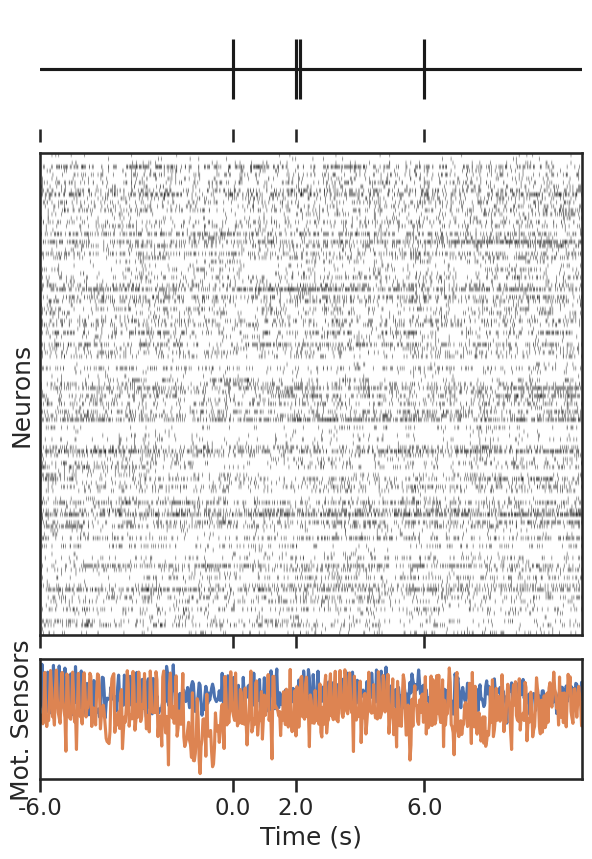

In [5]:
## trial design
area="VAL"
trial = 23
tr = pyal.concat_trials(df_, f"{area}_spikes", trial_indices=[trial-1, trial, trial+1])

mot_y = pyal.concat_trials(df_, "values_MotSen1_Y", trial_indices=[trial-1, trial, trial+1])
mot_x = pyal.concat_trials(df_, "values_MotSen1_X", trial_indices=[trial-1, trial, trial+1])

left_elbow_angle = pyal.concat_trials(df_, "left_elbow_angle", trial_indices=[trial-1, trial, trial+1])
right_elbow_angle = pyal.concat_trials(df_, "right_elbow_angle", trial_indices=[trial-1, trial, trial+1])

with plt.style.context('seaborn-v0_8-bright'):
    sns.set_theme(context='talk', style='ticks')
    fig, ax = plt.subplots(3, 1, figsize=(7, 10), sharex='all', gridspec_kw={'height_ratios': [1, 4, 1], 'hspace': 0.1})
    times = np.arange(tr.shape[0]) * 0.03
    im = ax[1].imshow(tr.T[:], cmap=vizutils.create_cmap_from_area('all'), origin="lower", aspect="auto")
    xticks = [0, df_.CP_rates.values[trial-1].shape[0]+1, df_.CP_rates.values[trial-1].shape[0]+1+66, df_.CP_rates.values[trial-1].shape[0]+1 + 200]  # 6 ticks
    ax[1].set_xticks(xticks)
    ax[1].set_xticklabels([f"{(x * Params.BIN_SIZE)-6:.1f}" for x in xticks])

    behav = np.zeros(tr.shape[0])
    ax[0].plot(behav, 'k')
    ax[0].vlines(x=df_.CP_rates.values[trial-1].shape[0]+1, ymin=-1, ymax=1, color='k')
    ax[0].vlines(x=df_.CP_rates.values[trial-1].shape[0]+1 + 66, ymin=-1, ymax=1, color='k')
    ax[0].vlines(x=df_.CP_rates.values[trial-1].shape[0]+1 + 70, ymin=-1, ymax=1, color='k')
    ax[0].vlines(x=df_.CP_rates.values[trial-1].shape[0]+1 + 200, ymin=-1, ymax=1, color='k')
    ax[0].set_yticks([])
    ax[0].set_ylim([-2, 2])
    for spine in ax[0].spines.values():
        spine.set_visible(False)



    ax[1].set_yticks([])
    ax[1].set_ylabel('Neurons')


    # ax[2].plot(mot_y)
    # ax[2].plot(mot_x)
    ax[2].set_yticks([])
    ax[2].set_ylabel('Mot. Sensors')
    ax[2].set_xlabel('Time (s)')


    ax[2].plot(left_elbow_angle)
    ax[2].plot(right_elbow_angle)


plt.show()


In [22]:
pyal.get_time_varying_fields(df, ref_field='left_elbow_angle')

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of left_elbow_angle on 99.85875706214689% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of left_elbow_angle on 99.85875706214689% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of left_elbow_angle on 99.85875706214689% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of left_elbow_angle on 

['hip_center',
 'left_ankle',
 'left_ankle_angle',
 'left_elbow',
 'left_elbow_angle',
 'left_foot',
 'left_knee',
 'left_knee_angle',
 'left_paw',
 'left_shoulder',
 'left_wrist',
 'left_wrist_angle',
 'right_ankle',
 'right_ankle_angle',
 'right_elbow',
 'right_elbow_angle',
 'right_foot',
 'right_knee',
 'right_knee_angle',
 'right_paw',
 'right_shoulder',
 'right_wrist',
 'right_wrist_angle',
 'shoulder_center',
 'tail_base',
 'tail_middle',
 'tail_tip']

In [39]:
df.right_wrist_angle.values[-1].shape

(47973,)

In [40]:
np.concatenate(df.right_wrist_angle.values[:]).shape

(413973,)

In [42]:
df.CP_spikes.values[-1].shape

(48000, 729)

In [87]:
probe_1 = np.concatenate([df_.all_imec0_spikes.values[0], df_.all_imec0_spikes.values[0]], axis=1)
probe_2 = np.concatenate([df_.all_imec1_spikes.values[0], df_.all_imec1_spikes.values[0]], axis=1)

# im = ax[1].imshow(tr.T[:], cmap=vizutils.create_cmap_from_area('all'), origin="lower", aspect="auto")


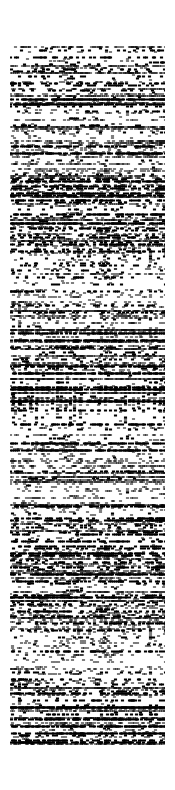

In [96]:
spike_times_per_neuron = [np.where(row)[0] for row in probe_1.T[:400, :]]
with plt.style.context('seaborn-v0_8-bright'):
    sns.set_theme(context='talk', style='ticks')
    fig, ax = plt.subplots(figsize=(2, 10))
    ax.eventplot(spike_times_per_neuron, orientation='horizontal', linelengths=0.8, colors='black')

    ax.set_yticks([])
    ax.set_xticks([])

    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()  # Optional: neuron 0 at top
    ax.set_xlim(0, 200)
plt.show()

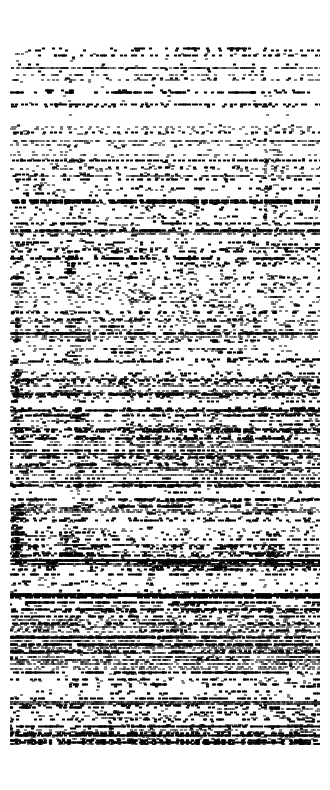

In [94]:
spike_times_per_neuron = [np.where(row)[0] for row in probe_2.T[:400, :]]
with plt.style.context('seaborn-v0_8-bright'):
    sns.set_theme(context='talk', style='ticks')
    fig, ax = plt.subplots(figsize=(4, 10))
    ax.eventplot(spike_times_per_neuron, orientation='horizontal', linelengths=0.8, colors='black')

    ax.set_yticks([])
    ax.set_xticks([])

    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()  # Optional: neuron 0 at top
    ax.set_xlim(0, 500)
plt.show()

In [90]:
probe_1.shape

(16000, 432)

In [91]:
probe_2.shape

(16000, 964)